# Final Project Peyton Fosnough

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [2]:
dataset=pd.read_csv('games.csv')

In [3]:
dataset.head()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAME_ID          26651 non-null  int64  
 1   HOME_TEAM_ID     26651 non-null  int64  
 2   VISITOR_TEAM_ID  26651 non-null  int64  
 3   SEASON           26651 non-null  int64  
 4   TEAM_ID_home     26651 non-null  int64  
 5   PTS_home         26552 non-null  float64
 6   FG_PCT_home      26552 non-null  float64
 7   FT_PCT_home      26552 non-null  float64
 8   FG3_PCT_home     26552 non-null  float64
 9   AST_home         26552 non-null  float64
 10  REB_home         26552 non-null  float64
 11  TEAM_ID_away     26651 non-null  int64  
 12  PTS_away         26552 non-null  float64
 13  FG_PCT_away      26552 non-null  float64
 14  FT_PCT_away      26552 non-null  float64
 15  FG3_PCT_away     26552 non-null  float64
 16  AST_away         26552 non-null  float64
 17  REB_away    

## Missing data with Numpy

In [5]:
dataset.isnull().sum()

GAME_ID             0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
TEAM_ID_away        0
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

### Check distribution to tell whether we should use mean or median

<AxesSubplot:xlabel='PTS_home', ylabel='Count'>

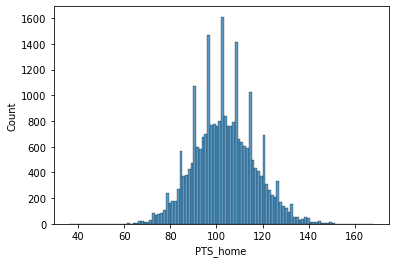

In [6]:
sns.histplot(dataset['PTS_home'])

### Use mean, data is normal

In [7]:
HomePTSmean=dataset['PTS_home'].mean()
dataset['PTS_home'].fillna(HomePTSmean, inplace=True)

In [8]:
dataset.isnull().sum()

GAME_ID             0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
TEAM_ID_away        0
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

<AxesSubplot:xlabel='FG_PCT_home', ylabel='Count'>

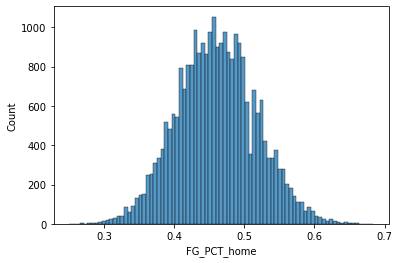

In [9]:
sns.histplot(dataset['FG_PCT_home'])

In [10]:
FGpctmean=dataset['FG_PCT_home'].mean()
dataset['FG_PCT_home'].fillna(FGpctmean, inplace=True)

In [11]:
dataset.isnull().sum()

GAME_ID             0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
TEAM_ID_away        0
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

### Time to get rid of the rest of the null values

In [12]:
FTpctmean=dataset['FT_PCT_home'].mean()
dataset['FT_PCT_home'].fillna(FTpctmean, inplace=True)

FG3pctmean=dataset['FG3_PCT_home'].mean()
dataset['FG3_PCT_home'].fillna(FG3pctmean, inplace=True)

ASThomemean=dataset['AST_home'].mean()
dataset['AST_home'].fillna(ASThomemean, inplace=True)

REBHmean=dataset['REB_home'].mean()
dataset['REB_home'].fillna(REBHmean, inplace=True)

PTSAmean=dataset['PTS_away'].mean()
dataset['PTS_away'].fillna(PTSAmean, inplace=True)

FGpctAmean=dataset['FG_PCT_away'].mean()
dataset['FG_PCT_away'].fillna(FGpctAmean, inplace=True)

FTpctAmean=dataset['FT_PCT_away'].mean()
dataset['FT_PCT_away'].fillna(FTpctAmean, inplace=True)

FG3pctAmean=dataset['FG3_PCT_away'].mean()
dataset['FG3_PCT_away'].fillna(FG3pctAmean, inplace=True)

ASTawaymean=dataset['AST_away'].mean()
dataset['AST_away'].fillna(ASTawaymean, inplace=True)

REBAmean=dataset['REB_away'].mean()
dataset['REB_away'].fillna(REBAmean, inplace=True)

In [13]:
dataset.isnull().sum()

GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
TEAM_ID_home       0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
TEAM_ID_away       0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

### Split the data into independent and dependent

In [14]:
dataset.columns

Index(['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home',
       'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

### Trying to predict if the home team wins or not

In [15]:
X=dataset.drop('HOME_TEAM_WINS',axis=1)
Y=dataset[['HOME_TEAM_WINS']]

## Experiment 1

### Split dataset into training/testing/validation sets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=50)

### Training the Logistic Regression model on the training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

### Making confusion matrix

In [18]:
y_pred=classifier.predict(X_test.values)

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[   0 4399]
 [   0 6262]]


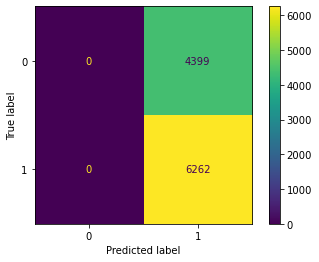

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative- 0, Flase Negative- 0, True Positive - 6262, Flase positive - 4399

### Classification Report 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4399
           1       0.59      1.00      0.74      6262

    accuracy                           0.59     10661
   macro avg       0.29      0.50      0.37     10661
weighted avg       0.35      0.59      0.43     10661



C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy is only 59% for 60/40 train/test split

## Experiment 2

### Splitting the data again

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=50)

### Training the Logistic Regression model

In [23]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

### Making confusion matrix

In [24]:
y_pred=classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[   0 2203]
 [   0 3128]]


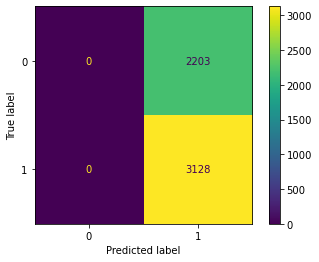

In [26]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative- 0, False Negative - 0, True positive - 3128, False positive - 2203

### Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2203
           1       0.59      1.00      0.74      3128

    accuracy                           0.59      5331
   macro avg       0.29      0.50      0.37      5331
weighted avg       0.34      0.59      0.43      5331



C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy is still 59% for 80/20 split

## Experiment 3

### Splitting dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=50)

### Training the logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

### Making confusion matrix

In [30]:
y_pred=classifier.predict(X_test.values)

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[   0 1123]
 [   0 1543]]


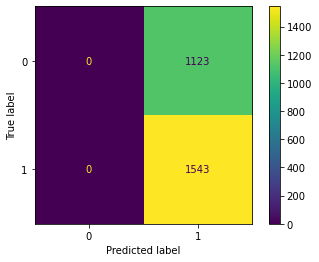

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative- 0, false negative- 0, true positive - 1543, false positive- 1123

### Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1123
           1       0.58      1.00      0.73      1543

    accuracy                           0.58      2666
   macro avg       0.29      0.50      0.37      2666
weighted avg       0.33      0.58      0.42      2666



C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfosn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy is 58% for 90/10 split